In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

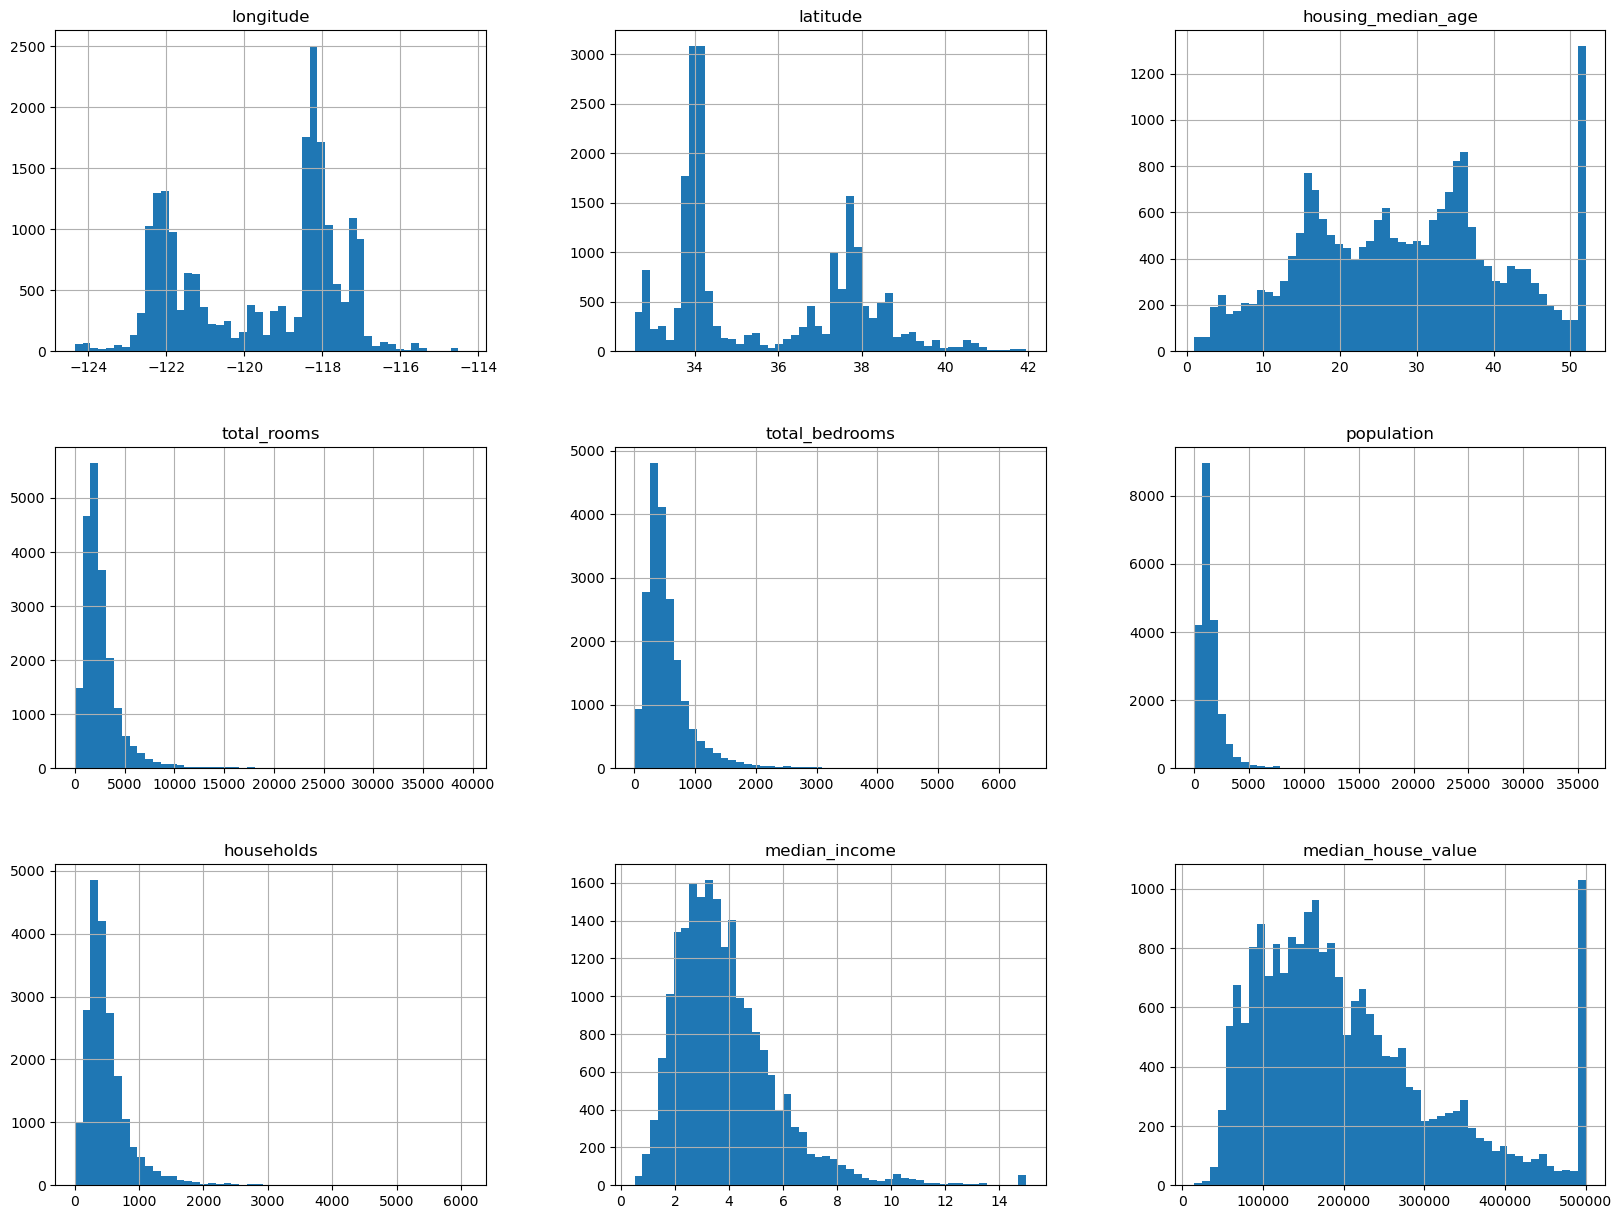

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Function to split into train and test sets

In [20]:
def splits(data,ratio):
    si = np.random.permutation(len(data))
    tss = int(len(data)*ratio)
    testi = si[:tss]
    traini = si[tss:]
    return data.iloc[traini],data.iloc[testi]

In [21]:
train_set,test_set = splits(df,0.2)

In [24]:
len(test_set)

4128

# use sklearn train test split

In [26]:
from sklearn.model_selection import train_test_split as spl

In [27]:
train_set,test_set = spl(df,test_size = 0.2,random_state = 42)

In [28]:
len(train_set)

16512

# Creating a new column to convert med icome to categorical column


In [33]:
df["income_cat"] = pd.cut(df["median_income"],bins = [0.,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])

<AxesSubplot:>

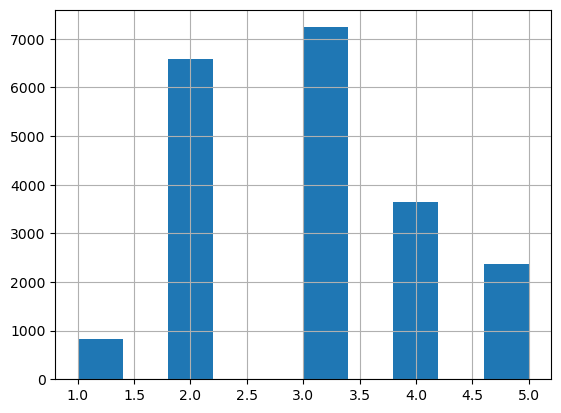

In [34]:
df.income_cat.hist()

In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


# Stratified Sampling

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit as sss

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = sss(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [40]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [41]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [42]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


# Viz

In [44]:
df_1 = strat_train_set.copy()
df_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

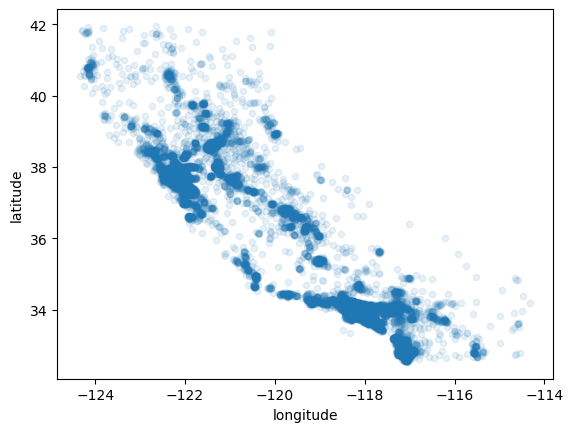

In [48]:
df_1.plot(kind='scatter',x = 'longitude',y='latitude',alpha=0.1)

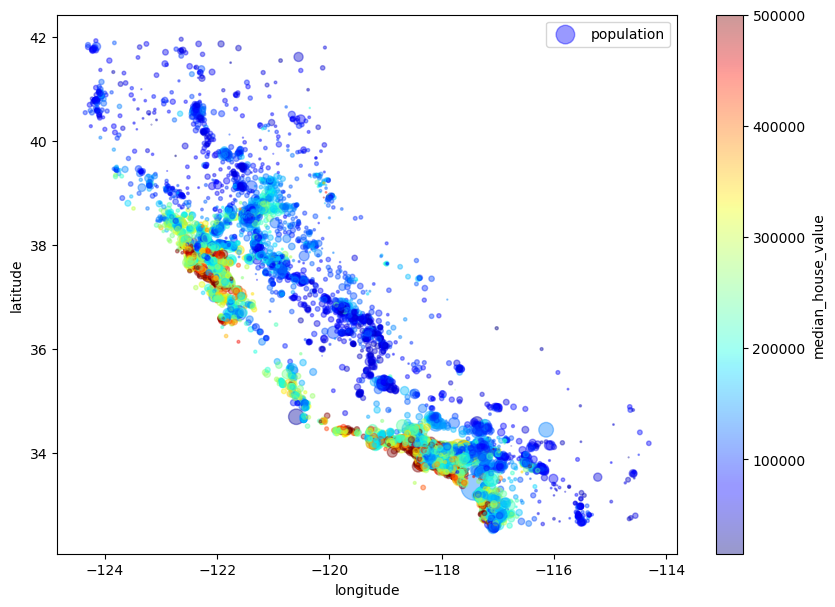

In [49]:
df_1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df_1["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# Correlation Coefficients

In [50]:
corr_matrix = df.corr()

In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

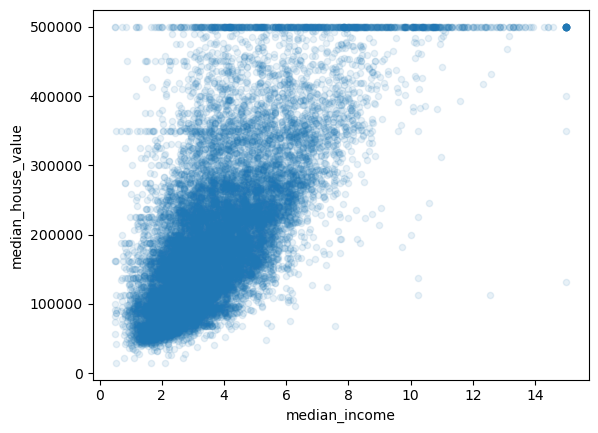

In [55]:
df_1.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

# Creating new features

In [56]:
df_1["rooms_per_household"] = df_1["total_rooms"]/df_1["households"]
df_1["bedrooms_per_room"] = df_1["total_bedrooms"]/df_1["total_rooms"]
df_1["population_per_household"]=df_1["population"]/df_1["households"]

In [57]:
df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


In [58]:
corr_matrix = df_1.corr()

In [59]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Data Preparation

In [60]:
# Separating the features and  the labels

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [61]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [62]:
# Imputing the missing values
# Use sklearn Simple imputer
from sklearn.impute import SimpleImputer

In [63]:
#Create instance of class

imputer = SimpleImputer(strategy = 'median')

In [64]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [65]:
# calc the medians

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [66]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [68]:
#Impute the missing values

X = imputer.transform(housing_num)

In [70]:
#Convert back to dataframe from numpy array

housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [71]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


# Handling text and string attributes

In [72]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [74]:
#Convert categories to numbers
#using sklean ordinal encoder

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [75]:
# fit and transform

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [76]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# One Hot Encoding

In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [78]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [79]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [80]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room
        def fit(self, X, y=None):
            return self # nothing else to do
        def transform(self, X, y=None):
            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling and Pipeline

Two types:

Min max scaling or Normalization
Standard scaling

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [87]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Combining num and cat transformers

In [88]:
from sklearn.compose import ColumnTransformer

In [89]:
## get all numerical attributes

num_attribs = list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [90]:
cat_attribs = ["ocean_proximity"]

In [91]:
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

In [92]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Modeling the data

In [93]:
#Linear regression

from sklearn.linear_model import LinearRegression

In [94]:
lin_reg = LinearRegression()

In [95]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [97]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [98]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


In [99]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# Evaluating the model

In [100]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

In [101]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [104]:
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse)

RMSE: 68376.51254853733


We got a very high value of RMSE here. Lets try a better model

# Decision tree experiment

In [105]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) 

DecisionTreeRegressor()

In [106]:
housing_predictions_dt = tree_reg.predict(housing_prepared)

In [107]:
tree_mse = mean_squared_error(housing_labels, housing_predictions_dt)

In [108]:
tree_rmse = np.sqrt(tree_mse)

In [109]:
print("RMSE:", tree_rmse)

RMSE: 0.0


Above is case of overfitting

# Using Cross Validation to check with tree and linreg

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

In [111]:
tree_rmse_scores = np.sqrt(-scores)

In [115]:
print("Scores:", tree_rmse_scores)

Scores: [70924.73114458 72116.52957748 70074.43927811 72567.81116977
 70813.34308483 76413.18139977 68466.72744725 72450.36583196
 70062.95722567 72155.42682227]


In [116]:
print("Mean:", tree_rmse_scores.mean())

Mean: 71604.55129816863


In [117]:
print("Standard deviation:", tree_rmse_scores.std())

Standard deviation: 2024.4416597452228


In [118]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

In [119]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [120]:
print("Scores:", lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]


In [121]:
print("Mean:", lin_rmse_scores.mean())

Mean: 68897.63006613274


In [122]:
print("Standard deviation:", lin_rmse_scores.std())

Standard deviation: 3002.7461275348655


# Checking Random Forest regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
for_reg = RandomForestRegressor()

In [125]:
for_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [127]:
housing_predictions = for_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18759.193149387695

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
scores = cross_val_score(for_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

In [131]:
rf_rmse_scores = np.sqrt(-scores)

In [132]:
print("Scores:", rf_rmse_scores)

Scores: [51117.82217043 48660.75770766 47144.63533778 51909.83961842
 47434.76867599 51825.88225047 52381.03968178 49929.8839492
 48252.60280943 53878.76502566]


In [133]:
print("Mean:", rf_rmse_scores.mean())

Mean: 50253.599722682105


In [134]:
print("Standard deviation:", rf_rmse_scores.std())

Standard deviation: 2188.3167476877366


# Save the model as a pickle file

In [136]:
import joblib

In [138]:
joblib.dump(for_reg, "my_model.pkl")

['my_model.pkl']

In [139]:
my_model_loaded = joblib.load("my_model.pkl")

In [140]:
my_model_loaded

RandomForestRegressor()

# Fine tuning the model using Grid search cv

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

In [142]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [143]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [144]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [145]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64563.40003161438 {'max_features': 2, 'n_estimators': 3}
55662.54354377033 {'max_features': 2, 'n_estimators': 10}
53290.812167744836 {'max_features': 2, 'n_estimators': 30}
60440.91542008848 {'max_features': 4, 'n_estimators': 3}
53743.29512077892 {'max_features': 4, 'n_estimators': 10}
51226.22533455086 {'max_features': 4, 'n_estimators': 30}
59042.319650893616 {'max_features': 6, 'n_estimators': 3}
53364.208951709144 {'max_features': 6, 'n_estimators': 10}
50999.751748101764 {'max_features': 6, 'n_estimators': 30}
60034.149019719225 {'max_features': 8, 'n_estimators': 3}
52533.25588080607 {'max_features': 8, 'n_estimators': 10}
50812.317546744685 {'max_features': 8, 'n_estimators': 30}
61748.23302104192 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54792.06480851968 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60306.72417474483 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53328.984496365476 {'bootstrap': False, 'max_features': 3, 'n_estimato

# Evaluating on test set

In [146]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
print("final rmse:", final_rmse)

final rmse: 48607.07363180906


# Computing a range

In [148]:
from scipy import stats

In [153]:
confidence = 0.95

In [154]:
squared_errors = (final_predictions - y_test) ** 2

In [155]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
 loc=squared_errors.mean(),
 scale=stats.sem(squared_errors)))

array([46598.17928878, 50536.17418313])